## Scientific Programming I: Breakout Solutions

In [1]:
%pylab inline
matplotlib.rcParams['savefig.dpi'] = 2 * matplotlib.rcParams['savefig.dpi']

Populating the interactive namespace from numpy and matplotlib


In [2]:
from scipy import misc
from scipy import ndimage

The following code will open the image file MV_HFV_012.png and display it.  This Scanning Element Microscopy image shows a glass sample (light gray) with some bubbles (on black) and unmolten sand grains (dark gray).

(-0.5, 1023.5, 942.5, -0.5)

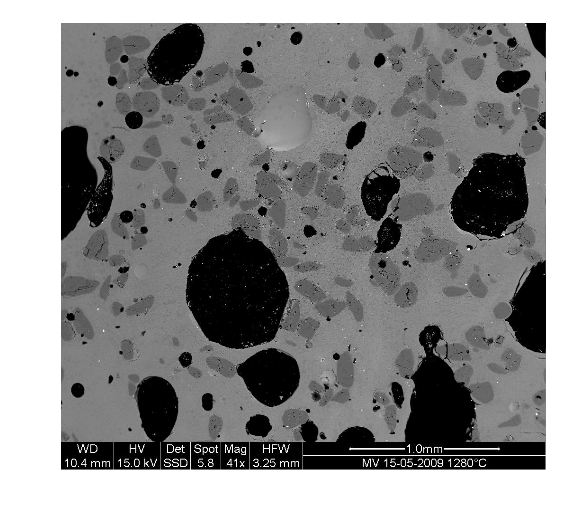

In [3]:
img = plt.imread("MV_HFV_012.png")
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(img, cmap=cm.gray)
ax.axis('off')

1) Crop the image to remove the lower panel with measure information. Then re-plot the trimmed image.

(-0.5, 1023.5, 882.5, -0.5)

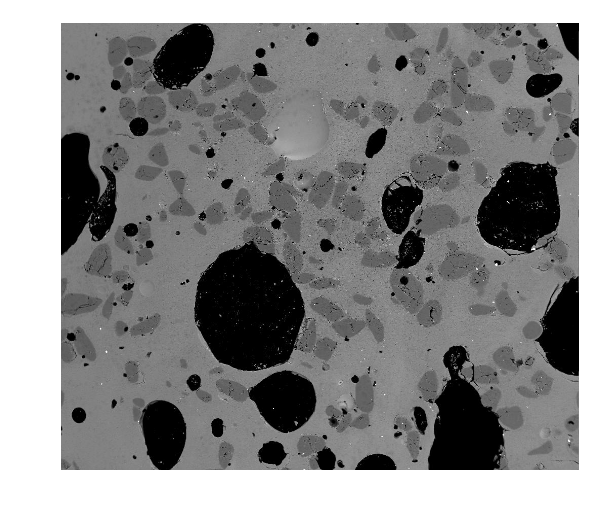

In [4]:
trim = img[:-60,:]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(trim, cmap=cm.gray)
ax.axis('off')

2) Slightly filter the image with a median filter in order to refine its histogram. Check how the histogram changes.

Use `ndimage.median_filter` to filter the image and `plt.hist` to make separate histograms of the filtered and unfiltered pixel distributions.

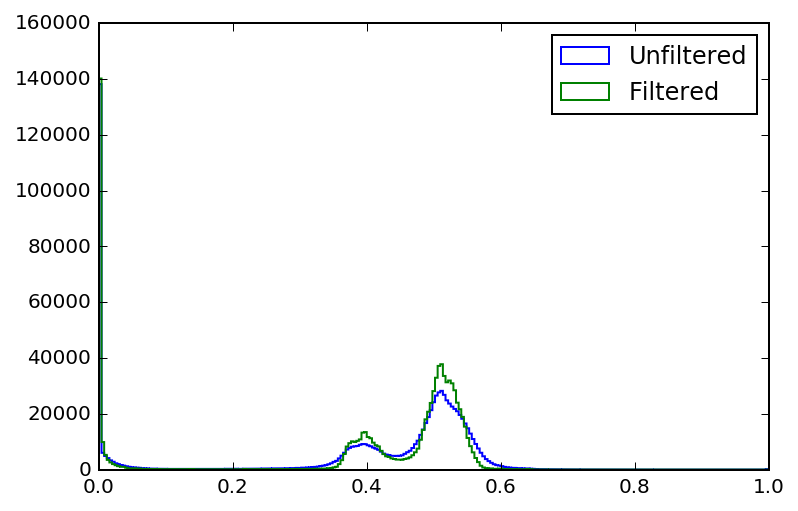

In [5]:
filtdat = ndimage.median_filter(trim, size=(7,7))
thist = plt.hist(np.ravel(trim), bins=np.linspace(0,1,256), histtype="step", label="Unfiltered")
fhist = plt.hist(np.ravel(filtdat), bins=np.linspace(0,1,256), histtype="step", label="Filtered")
plt.legend()

3) Using the histogram of the filtered image, determine thresholds that allow to define masks for sand pixels, glass pixels and bubble pixels.

For example, you can isolate bubble pixels by creating a mask (array of booleans) this way:

`bubble = filtdat <= 0.2`

To combine conditions you can `np.logical_and()`.

In [7]:
bubble = filtdat <= 0.2
sand = np.logical_and(filtdat > 0.2, filtdat <= 0.45)
glass = filtdat > 0.45

4) Display an image in which the three phases are colored with three different colors. You can do this by using you existing masks for the sand, glass and bubble pixels to create a new ndarray in which each type is assigned a different integer (1, 2, 3).

For example `glass.astype(np.int)` will create an array in which the integer 1 is assigned to all elements in the array `glass` which have the value of True.

(-0.5, 1023.5, 882.5, -0.5)

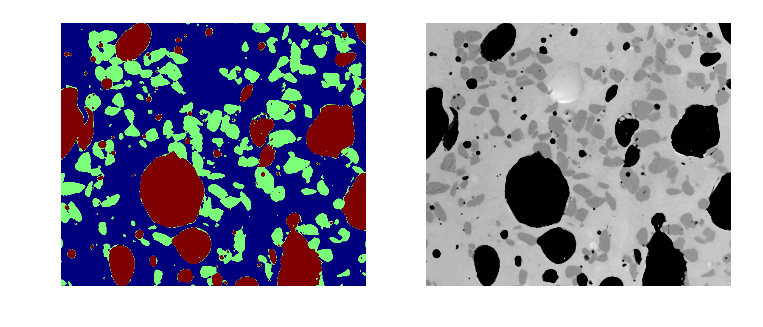

In [8]:
phases = glass.astype(np.int) + 2*sand.astype(np.int) + 3*bubble.astype(np.int)
fig = plt.figure()
ax = fig.add_subplot(121)
ax.imshow(phases)
ax.axis('off')
ax2 = fig.add_subplot(122)
ax2.imshow(filtdat, cmap=cm.gray)
ax2.axis('off')

You can attribute labels to all bubbles and sand grains, and remove from the sand mask grains that are smaller than 10 pixels. To do so, use `ndimage.sum` or `np.bincount` to compute the grain sizes.

In [9]:
sand_labels, sand_nb = ndimage.label(sand)
sand_areas = np.array(ndimage.sum(sand, sand_labels, np.arange(sand_labels.max()+1)))
mask = sand_areas > 100
remove_small_sand = mask[sand_labels.ravel()].reshape(sand_labels.shape)

5) Finally, we can compute the mean and median size of bubbles.

In [10]:
bubbles_labels, bubbles_nb = ndimage.label(bubble)
bubbles_areas = np.bincount(bubbles_labels.ravel())[1:]
mean_bubble_size = bubbles_areas.mean()
median_bubble_size = np.median(bubbles_areas)
mean_bubble_size, median_bubble_size

(1685.0095238095239, 60.0)